# Exercise 1: MD simulations of LJ-Ag

## SVOLGIMENTO PUNTO 5

---

## Consegna

### Parametri

In all simulations model Ag interatomic interactions using the LJ potential ($\varepsilon = 0.345$ eV and $\sigma = 2.644$ Å) with the cutoff radius at $R_C = 4.5$ Å. Assume $t_\text{th} = 3$ ps as thermalization time and use the simulation cell of 256-atoms (file `fcc100a256.txt` on the elearning page) unless stated differently. From point 3,

### Punto 4

### Punto 5

---

## Svolgimento PUNTO 5

### 0) Importazioni e dati

In [ ]:
import numpy as np
from CMS.MolecularDynamics import CrystalStructure as Crystal
from CMS.MolecularDynamics import CrystalDynamics, CrystalDynamicsResult


In [2]:
# Nome del file (numero di atomi da studiare: 336 + 1 adatom)
filename = '../../../data/fcc111a336+1.txt'

#### Dati globali

In [3]:
# boundaries della cella da studiare (crystal slab)
pcb = [20.3817, 20.3817, 203_817]  # in Å (z enorme (> Lx*10_000))

# temperature da studiare
temperature = [850, 300] # in K

# massa atomica dell'atomo considerato (argento)
silver_mass = 108

# time step ottimale per 1000K
time_step = 4e-15 

# il numero di step è dato dal tempo totale (300ps) diviso il time step
tempo_totale = 300e-12
n_steps = int(tempo_totale / time_step)

# tempo di termalizzazione (ogni valore precedente va buttato)
t_th = 3e-12

### 1) Simulazione di 300ps a T = 850 K e T = 300 K

In [4]:
from libraries.io import AtomTracker, XYZwriter
# Inizializzo il tracker per l'atomo aggiunto (ultimo atomo)
adatom_tracker_unbounded = [
    AtomTracker(index=-1, output_file='output/Esercizio1_5_850/adatom_track_unbounded.txt'), 
    AtomTracker(index=-1, output_file='output/Esercizio1_5_300/adatom_track_unbounded.txt')
]
adatom_tracker_periodic = [
    AtomTracker(index=-1, output_file='output/Esercizio1_5_850/adatom_track_periodic.txt', pcb_option='periodic'), 
    AtomTracker(index=-1, output_file='output/Esercizio1_5_300/adatom_track_periodic.txt', pcb_option='periodic')
]
# Inizializzo lo scrittore XYZ per salvare la dinamica
xyz_writers = [
    XYZwriter(output_folder='output/Esercizio1_5_850/', dt=time_step, dump_interval=200), 
    XYZwriter(output_folder='output/Esercizio1_5_300/', dt=time_step, dump_interval=200)
]

Per 256 atomi, con scrittura dei file: 32 secondi

In [5]:
result_list = []

In [6]:
for temperatura, a_t_unbounded, a_t_periodic, xyz_writer in zip(temperature, adatom_tracker_unbounded, adatom_tracker_periodic, xyz_writers):
    print(f"🚀 Avvio simulazione a T={temperatura} K")    
    
    # Raccolgo le energie medie e le dev std
    # Inizializzo il cristallo dal file minimizzato con steepest-descent
    cristallo = Crystal.from_file(filename)
    # Setto il raggio di cutoff E la giunzione polinomiale
    cristallo.set_R_C(4.5)
    cristallo.set_R_P(4.2)
    cristallo.set_R_V(5.0) # n.b.: R_V > R_C e va settato DOPO R_C
    # Setto le condizioni al contorno periodiche (vanno settate DOPO R_C)
    cristallo.set_pbc(pcb)

    simulazione = CrystalDynamics(cristallo, 
                        atomic_mass=silver_mass, 
                        dt=time_step, 
                        temp_ini=temperatura, 
                        atom_tracker=[a_t_unbounded, a_t_periodic], 
                        xyz_writer= xyz_writer)  
    simulazione.set_seed(12316543)

    # stavolta output True per visualizzare con ovito
    result: CrystalDynamicsResult = simulazione.run_dynamics(n_steps=n_steps, 
                                                            t_th=t_th,
                                                            rescale_velocity=True,
                                                            debug=False)
    
    result_list.append(result)

🚀 Avvio simulazione a T=850 K
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5, R_P=4.2 e R_V=5.0.
🚀 Avvio simulazione a T=300 K
⚠️ Vicini non calcolati in precedenza. Calcolo con R_C=4.5, R_P=4.2 e R_V=5.0.


### 2) Analisi e plot

#### 2.1) Alcuni dati della simulazione

In [7]:
for r, temp in zip(result_list, temperature):
    print(f"Risultati per T={temp} K")
    r.summary()

Risultati per T=850 K
Simulation Result:
 - Duration: 0.00 ps
 - Mean Temp: 837.70 ± 27.12 K
 - Mean Energy: -635.23 ± 0.01 eV

Risultati per T=300 K
Simulation Result:
 - Duration: 0.00 ps
 - Mean Temp: 313.73 ± 9.77 K
 - Mean Energy: -680.91 ± 0.00 eV



#### 2.2) Plot x,y di adatom

#### Adatom non confinato

In [8]:
import matplotlib.pyplot as plt

# data = np.loadtxt("output/dynamics/steps100000~dt3e-15~T1700~Ag~257/adatom_track.txt", skiprows=1, delimiter="\t")
data1 = np.loadtxt("output/Esercizio1_5_850/adatom_track_unbounded.txt", skiprows=2, delimiter="\t")
x1 = data1[:, 1]
y1 = data1[:, 2]

data2 = np.loadtxt("output/Esercizio1_5_300/adatom_track_unbounded.txt", skiprows=2, delimiter="\t")
x2 = data2[:, 1]
y2 = data2[:, 2]

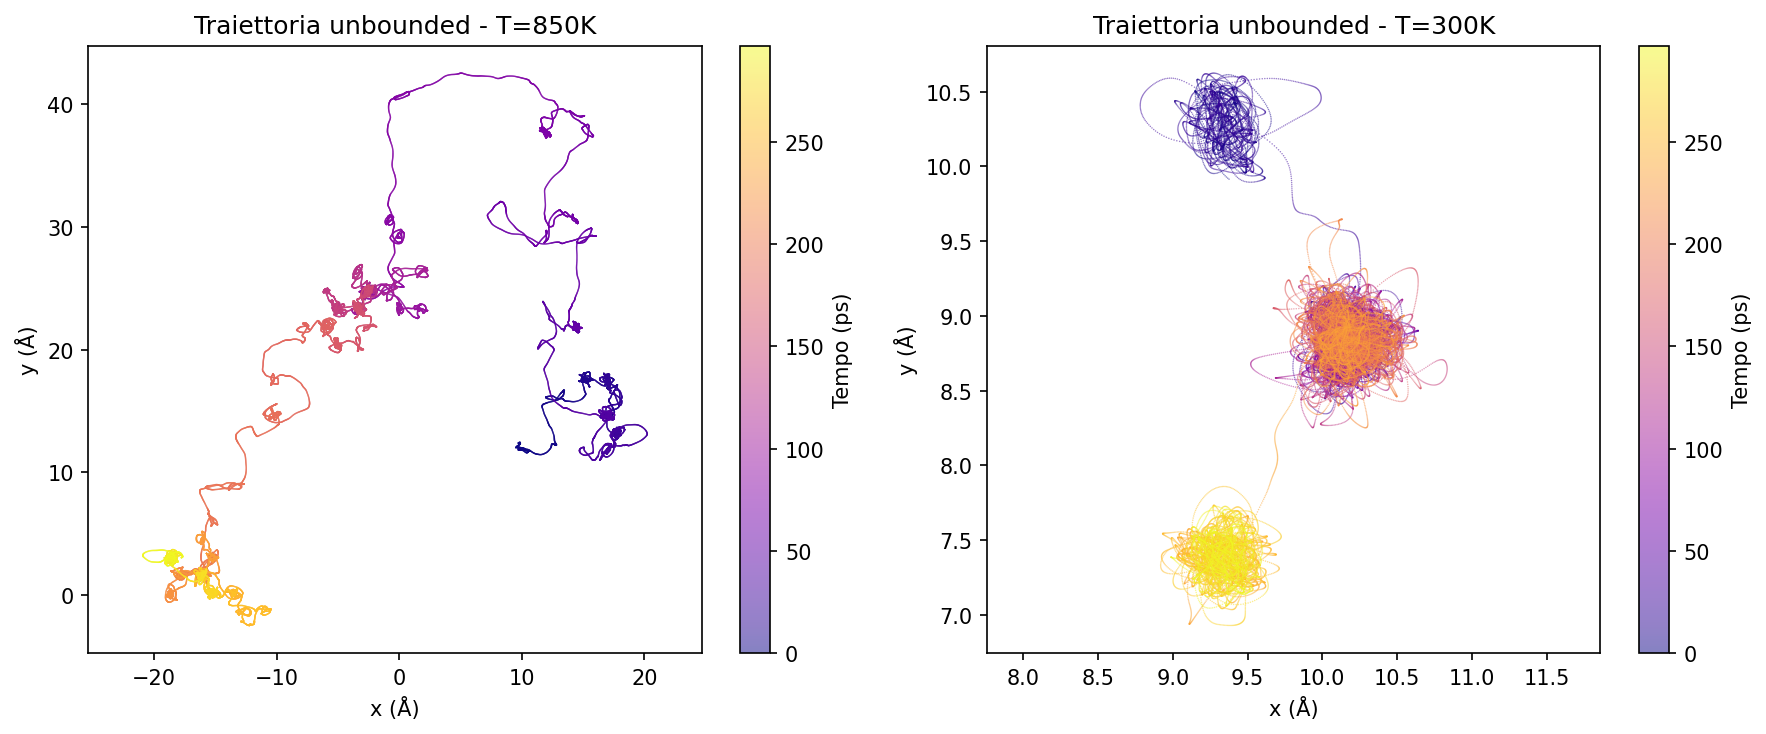

In [9]:
# metto due grafici per 850K e 300K uno accanto all'altro 
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# Creiamo un array di indici per il colore
time_indices1 = np.arange(len(x1)) * (time_step * 1e12)  # Convertiamo gli step temporali in picosecondi

# Usiamo scatter
ax[0].scatter(x1, y1, c=time_indices1, cmap='plasma', s=0.5, linewidth=0, alpha=0.5)

ax[0].set_xlabel('x (Å)')
ax[0].set_ylabel('y (Å)')
ax[0].set_title("Traiettoria unbounded - T=850K")
ax[0].axis('equal') # Per non distorcere la geometria

cbar1 = plt.colorbar(ax[0].collections[0], ax=ax[0])
cbar1.set_label('Tempo (ps)')

# Creiamo un array di indici per il colore
time_indices2 = np.arange(len(x2)) * (time_step * 1e12)  # Convertiamo gli step temporali in picosecondi

# Usiamo scatter. 
# c=time_indices dice di usare l'indice per il colore
# s=0.5 rende i punti piccolissimi
# linewidth=0 toglie il bordo ai punti per evitare che si sovrappongano troppo
ax[1].scatter(x2, y2, c=time_indices2, cmap='plasma', s=0.5, linewidth=0, alpha=0.5)

ax[1].set_xlabel('x (Å)')
ax[1].set_ylabel('y (Å)')
ax[1].set_title("Traiettoria unbounded - T=300K")
ax[1].axis('equal') # Per non distorcere la geometria

cbar2 = plt.colorbar(ax[1].collections[0], ax=ax[1])
cbar2.set_label('Tempo (ps)')

plt.tight_layout()
plt.show()

#### Adatom confinato

In [10]:
data3 = np.loadtxt("output/Esercizio1_5_850/adatom_track_periodic.txt", skiprows=2, delimiter="\t")
x3 = data3[:, 1]
y3 = data3[:, 2]

data4 = np.loadtxt("output/Esercizio1_5_300/adatom_track_periodic.txt", skiprows=2, delimiter="\t")
x4 = data4[:, 1]
y4 = data4[:, 2]

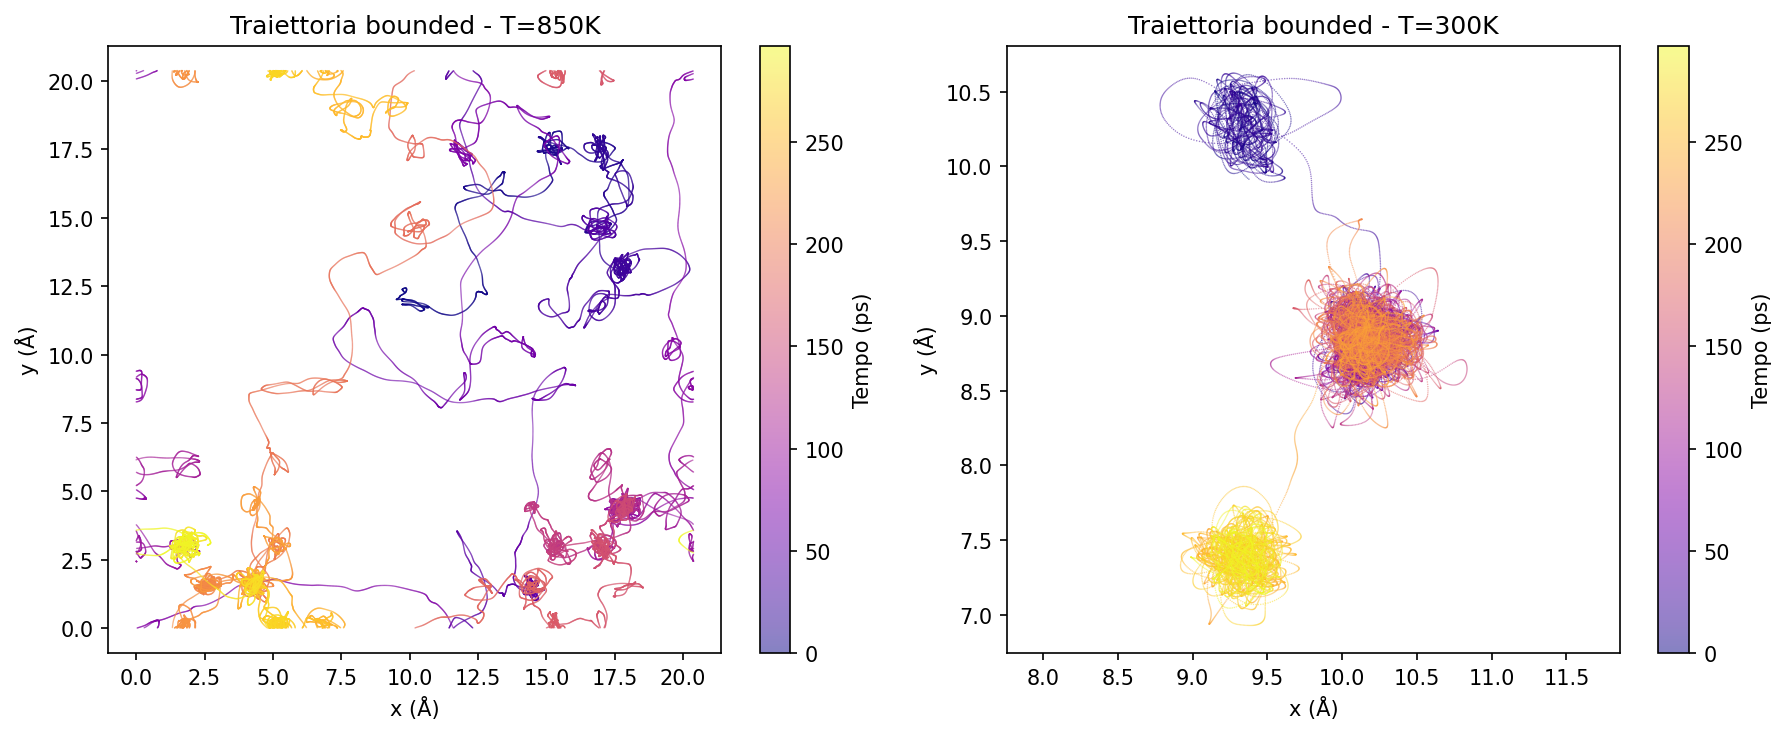

In [11]:
# metto due grafici per 850K e 300K uno accanto all'altro 
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=150)

# Creiamo un array di indici per il colore
time_indices1 = np.arange(len(x3)) * (time_step * 1e12)  # Convertiamo gli step temporali in picosecondi

# Usiamo scatter
ax[0].scatter(x3, y3, c=time_indices1, cmap='plasma', s=0.5, linewidth=0, alpha=0.5)

ax[0].set_xlabel('x (Å)')
ax[0].set_ylabel('y (Å)')
ax[0].set_title("Traiettoria bounded - T=850K")
ax[0].axis('equal') # Per non distorcere la geometria

cbar1 = plt.colorbar(ax[0].collections[0], ax=ax[0])
cbar1.set_label('Tempo (ps)')

# Creiamo un array di indici per il colore
time_indices2 = np.arange(len(x4)) * (time_step * 1e12)  # Convertiamo gli step temporali in picosecondi

# Usiamo scatter. 
# c=time_indices dice di usare l'indice per il colore
# s=0.5 rende i punti piccolissimi
# linewidth=0 toglie il bordo ai punti per evitare che si sovrappongano troppo
ax[1].scatter(x4, y4, c=time_indices2, cmap='plasma', s=0.5, linewidth=0, alpha=0.5)

ax[1].set_xlabel('x (Å)')
ax[1].set_ylabel('y (Å)')
ax[1].set_title("Traiettoria bounded - T=300K")
ax[1].axis('equal') # Per non distorcere la geometria

cbar2 = plt.colorbar(ax[1].collections[0], ax=ax[1])
cbar2.set_label('Tempo (ps)')

plt.tight_layout()
plt.show()